# Statistics in Python

In this hands-on activity, we're going to learn how to conduct foundational, descriptive, and inferential statistics in Python. Using user review data from Google and Apple, we'll analyse different components of the data to gain a better understanding of the differences between the two companies and how customers perceive the performance of their apps. 

### Research Question/Brief

Did Apple Store apps receive different user ratings than Google Play apps?

## Activity Goals
After we load and clean our data, we'll do the following:

1. Foundations
    - Identify levels of measurement for our variables of interest
    - Visualize the distributions of our data
2. Descriptive statistics
    - Calculate and interpret measures of central tendency and spread for our variables of interest
3. Inferential statistics 
    - Restate the formulated hypotheses and determine significance level
    - T-tests and other statistical tests

## Import Libraries & Load Data
To get started, we first need to import our relevant Python libraries, as well as load in our datasets.

In [2]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

The data we'll be using today is a _slightly altered_ version from the original, which you can find on Kaggle. Kaggle is an excellent repository of data and various data-driven competitions that people all over the world can compete in. If you're curious, original data from the Google Store is [here](https://www.kaggle.com/lava18/google-play-store-apps) and the original data from Apple Store is [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). 

For today's workshop, the data have already been cleaned, transformed and merged into one neat file. Let's download the combined datasets and save them to the Desktop. You can access them [here](https://github.com/DecodedCo/data-fellowship/tree/master/data).

For the purposes of this exercise, we'll focus specifically on a few of the variables from each dataset that are of interest for answering our brief.
- Category 
- Rating
- Reviews
- Price 

Let's load in the dataset and take a look at each of these columns. 

In [3]:
# Load the data into a pandas dataframe called 'df' using pandas read_csv
df = pd.read_csv("apple_google_merged.csv", index_col=0)

# Let's observe the first three entries
df.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,3.11,159,0.0,google
1,ART_AND_DESIGN,3.37,967,0.0,google
2,ART_AND_DESIGN,1.67,87510,0.0,google
3,ART_AND_DESIGN,2.22,215644,0.0,google
4,ART_AND_DESIGN,3.12,967,0.0,google


## 1. Foundations  
In this section of the workshop, we'll cover some of the basics associated with statistics. First, let's take a look at how some of our variables are measured and what their data types are. We can do this quickly by using the `.info()` function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 18036
Data columns (total 5 columns):
Category    15634 non-null object
Rating      15634 non-null float64
Reviews     15634 non-null int64
Price       15634 non-null float64
platform    15634 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 732.8+ KB


Based on the output, we can see that are variables are various data types. Most importantly, some of them are floats, while some of them are integers. For example, the variable 'Reviews' is an integer, which means it's a whole number. However, the 'Rating' variable is a float, which means it can have decimal points.  

For our brief, we are primarily concerned with the **ratings** given to Apple and Google. We can get a better feel for how the variable 'Rating' is measured by using the `.unique()` and `.value_counts()` functions.

In [5]:
df['Rating'].unique()

array([3.11, 3.37, 1.67, 2.22, 3.12, 4.48, 4.7 , 1.89, 2.03, 3.38, 3.7 ,
       3.51, 3.28, 2.81, 3.8 , 1.77, 6.14, 4.69, 2.49, 0.94, 2.8 , 4.11,
       4.95, 3.93, 4.13, 3.39, 3.71, 4.21, 3.6 , 3.68, 3.33, 2.87, 3.81,
       3.78, 3.34, 3.92, 1.93, 3.54, 4.43, 4.53, 2.79, 2.34, 3.85, 2.06,
       3.61, 4.04, 4.67, 3.77, 3.95, 4.1 , 0.97, 4.68, 2.89, 3.04, 3.98,
       4.61, 3.47, 3.58, 2.53, 2.68, 1.55, 4.18, 2.56, 5.13, 5.75, 2.12,
       3.76, 4.85, 6.75, 6.18, 2.35, 0.62, 2.3 , 4.42, 3.24, 5.28, 4.24,
       4.39, 2.63, 3.35, 5.34, 2.1 , 2.09, 3.79, 5.69, 4.  , 2.27, 2.38,
       2.36, 3.74, 5.82, 4.6 , 3.44, 1.28, 3.56, 2.52, 3.4 , 4.74, 2.61,
       2.48, 2.72, 7.08, 4.52, 5.35, 4.4 , 2.6 , 3.18, 2.78, 3.99, 4.17,
       4.19, 3.83, 4.2 , 3.63, 3.42, 4.86, 2.44, 4.12, 0.96, 4.23, 4.92,
       3.84, 5.26, 3.86, 2.33, 5.64, 2.45, 2.32, 6.36, 3.65, 4.64, 2.66,
       4.59, 4.05, 3.03, 4.32, 4.71, 5.49, 6.27, 3.  , 3.14, 2.54, 3.5 ,
       4.27, 6.23, 4.88, 2.31, 2.95, 4.14, 6.72, 3.

In [6]:
df['Rating'].value_counts()

3.51    75
2.88    71
3.33    67
3.02    67
3.76    67
        ..
6.72     1
0.74     1
6.39     1
0.30     1
7.07     1
Name: Rating, Length: 671, dtype: int64

We can see that the variable 'Rating' is a continuous variable, but we can't tell much beyond that. To glean more insight, let's use the `.describe` function on the 'Rating' variable.

In [7]:
df["Rating"].describe()

count    15634.000000
mean         3.454387
std          1.106925
min          0.000000
25%          2.710000
50%          3.430000
75%          4.190000
max          8.480000
Name: Rating, dtype: float64

The variable ranges from 0 to 5 (stars), with a mean of 3.45. However, we don't know how this differs between the two companies we are analysing! Let's use the `.groupby()` function in tandem with the `.describe()` function to get some more information on ratings for Apple and Google. 

In [8]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,3.336313,0.939340,0.0,2.71,3.33,3.96,6.55
google,9366.0,3.533405,1.199718,0.0,2.71,3.54,4.35,8.48


It seems that the data we are most interested in - the ratings among users for each platform - are _continuous_. It also appears that the data have a discernable order and are measured in _intervals_, with a rating of 0 being the lowest and a rating of 5 being the highest. With this information in hand, we can explore the descriptive statistics of our data, specifically the ratings among users of Google and Apple apps.

## 2. Descriptive Statistics 
In this section of the workshop, we'll explore the descriptive statistics of our dataset. This essentially means:
This essentially means: 

1. Finding where your data is centred -- i.e. _measures of centrality_.
2. Finding how spread out your data is -- i.e. _measures of spread._
3. Visualising your distribution using 
    - Histograms 
    - Boxplots


In fact, we've already done most of this already! Points 1 and 2 are mostly covered with the handy `.describe()` function we used above. Despite that however, it may be useful to laser in on specific metrics, which is what we'll explore now.


> _You'll get lots of time to cover and refresh descriptive statistics in more depth in your online practice._ 

In [14]:
# Running .describe() again
df.describe()

,Rating,Reviews,Price
count,15634.000000,1.563400e+04,15634.000000
mean,3.454387,3.138916e+05,1.306140
std,1.106925,2.446250e+06,12.848935
min,0.000000,1.000000e+00,0.000000
25%,2.710000,1.150000e+02,0.000000
50%,3.430000,1.628000e+03,0.000000
75%,4.190000,2.814825e+04,0.000000
max,8.480000,7.815831e+07,400.000000


### Measures of Central Tendency 
In addition to the `.describe()` function, there are a number of other built-in functions provided by the `pandas` library that help us obtain our measures of central tendency. We can pull out a number of useful descriptive statistics by calling any of the variables in our dataset and then adding the measure of central tendency to the end.

How would we compute these without the `pandas` functions?

In [15]:
# Median
df['Rating'].median()

3.43

In [16]:
# Mean
df['Rating'].mean()

3.454386593322255

In [17]:
# Mode
df['Rating'].mode()

0    3.51
dtype: float64

What if we wanted to get the measures of central tendency, but grouped by the platform (e.g., Google or Apple)? We can use the `.groupby()` function again to do this. Like before, we can find the mean, median, and mode for the 'Rating' variable for users of the Apple and Google apps. 

In [18]:
# Mean by group
df.groupby(by='platform')['Rating'].mean()

platform
apple     3.336313
google    3.533405
Name: Rating, dtype: float64

In [19]:
# Median by group
df.groupby(by='platform')['Rating'].median()

platform
apple     3.33
google    3.54
Name: Rating, dtype: float64

In [20]:
# Mode by group
df.groupby(by='platform')['Rating'].agg(pd.Series.mode)

platform
apple             3.39
google    [3.33, 3.51]
Name: Rating, dtype: object

Based on these results, we can tentatively identify a few trends in the app data. If we're basing our evaluations on the mean or the median, it appears Google has better average app ratings than Apple does. With both the mean and median, it seems the difference is about ~0.2 stars.

The question is: is this a big -- or a _significant_ difference? What do you think? To answer this question, we need hypothesis testing. We'll dig into this in the next section.

### Measures of Spread
We also need to know how much spread/deviation/variation there is in our data. The measures of central tendency that we've calculated for both platforms are similar, so it will be useful to dig a little deepter to understand how dispersed our data points are among users who provide app ratings for Google and Apple.

In [21]:
# Range
df['Rating'].max()-df['Rating'].min()

8.48

 We also need to know how much variation there is around the mean of our data. The **variance** gives us the mathematical dispersion of the data relative to the mean. However, the units aren't great for comparison because they're squared, so we also rely on the standard deviation. **Standard deviation** is the square root of the variance and gives a value that's on the same scale as the original values, which helps with interpretation. Like before, we can use the built-in `pandas` functions to get these values. 
 
 How would we compute these without the `pandas` functions?

In [22]:
# Variance
df['Rating'].var()

1.2252836798714355

In [23]:
# Standard deviation
df['Rating'].std()

1.1069253271433603

While informative, this doesn't tell us much about the spread of the data based on our two platforms, Apple and Google. For example, it's the case that the mode for both groups are similar, but is it also the case that the standard deviation of ratings are similar between Apple and Google? Let's take a closer look at some of the metrics by group.

In [24]:
df.groupby(by='platform')['Rating'].max()-df['Rating'].min()

platform
apple     6.55
google    8.48
Name: Rating, dtype: float64

In [25]:
# Variance by group
df.groupby(by='platform')['Rating'].var()

platform
apple     0.882359
google    1.439322
Name: Rating, dtype: float64

In [26]:
# Standard deviation by group
df.groupby(by='platform')['Rating'].std()

platform
apple     0.939340
google    1.199718
Name: Rating, dtype: float64

When grouped by app platform, the measures of spread aluminate the differences between Apple and Google user ratings. For example, when the standard deviation is small, it means the data points are grouped closer to the mean, while a larger standard deviation means they're more dispersed. In this case, there is more variability among the ratings provided by Google users than there are for Apple users. 

Recall that our group means are somewhat similar (3.33 for Apple and 3.53 for Google), so analysing the spread gives us a better idea of how close to the mean each group's user ratings are. It also suggests there are fewer higher and lower rating values among Apple users when compared to Google users. 

### Visualising distributions
We can also visualise our variables by using the `Seaborn` package. Visualising our data helps us understand the distributions of the data points, which in turn helps us make decisions about how we test our hypotheses, etc.

There are two main ways to visualise a distribution:
1. Histograms;
2. Boxplots (or box-and-whisker plots)

We'll begin with histograms, and we'll build them using the handy `distplot()` function from Seaborn.

Like we've done above, we'll focus on the 'Ratings' variable since it's our variable of interest for our brief.

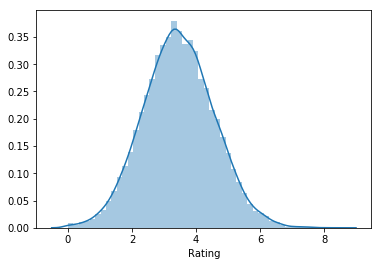

In [27]:
sns.distplot(df['Rating'], hist=True, rug=False)

T:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

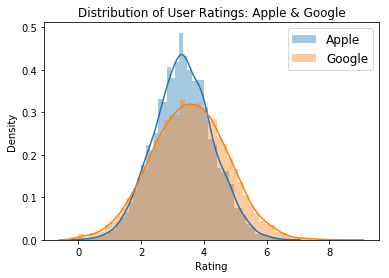

In [28]:
apple = df[df['platform'] == 'apple']
google = df[df['platform'] == 'google']

sns.distplot(apple['Rating'], hist = True, kde = True, label='Apple')
sns.distplot(google['Rating'], hist = True, kde = True, label='Google')

# Play with kde = , and hist = ! Change True to False and vice versa.

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of User Ratings: Apple & Google')
plt.xlabel('Rating')
plt.ylabel('Density') 

We can visualise the spread of our data using a boxplot. In seaborn, we use the `boxplot()` function to do this. 

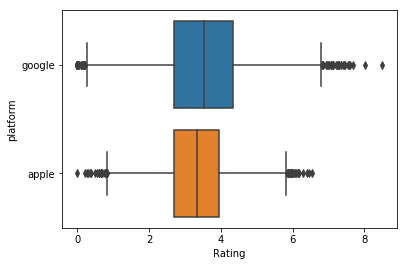

In [29]:
sns.boxplot(x=df['Rating'], y=df['platform'])

The boxplot gives us a few things:
1. It gives us the **_median_**. This is represented by the line in the middle of the box.<br><br>
2. It gives us the **_25th percentile_**. This represented by the left edge of the box.<br><br>
3. It gives us the **_75th percentile_**. This represented by the right edge of the box.<br><br>
4. It gives the **_Interquartile range (IQR)_**. This is the difference between the 75th and 25th percentiles -- i.e. the width of the box.<br><br>
5. It gives us the **_whiskers_**, which are calculated by adding/subtracting the IQR from either edge of the box, usually scaled to a factor of 1.5. I.e. 
    - Right whisker = 75th percentile + 1.5*IQR
    - Left whisker = 25th percentile - 1.5*IQR
<br><br>
6. It gives us the **_outliers_**. These are defined as any data points beyond the whiskers.

## 3. Inferential Statistics
Finally, we'll use inferential statistics to make generlizations about our data samples to the larger population. The first step in this process is to define the hypotheses that we want to test. Let's formulate a null and an alternative hypothesis for the question from our brief.

**H<sub>null</sub>**: The average user ratings of Apple and Google users are equal (e.g., there is no difference between the two). If there is a difference, then it is due to random chance.

**H<sub>alternative</sub>**: The average user ratings of Apple users is different than that of Google users. We say this difference so large, it cannot simply be due to chance; it's _statistically significant_.

Next, we'll determine the significance level. While this differs among disciplines, the conventional level is 0.05 -- i.e. a confidence level of 0.95.

**Significance level**: 0.05<br>
**Confidence level**: 0.95


Now that the hypotheses and significance levels are defined, we are going to try to reject or accept the null hypothesis by using statistical tests. We'll start with the [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test), which is derived from the t-distribution, to evaluate differences between two independent groups. For our brief, we'll conduct a Student's t-test using the `stats.ttest_ind` function to compare the differences between Apple and Google user ratings.

In [30]:
# Create subsets of the column 'Rating' by the different platforms so we can do a t-test. 
apple = df[df['platform']== 'apple']['Rating']
google = df[df['platform']== 'google']['Rating']

In [31]:
# Run a Student's t-test
t_test =stats.ttest_ind(apple, google)

# Check summary results
t_test

Ttest_indResult(statistic=-10.952238132563531, pvalue=8.181414938323484e-28)

In [32]:
# Let's use an if-else statement to spit out a coherent result for us
if t_test.pvalue < 0.05:
    print('The p-value is', t_test.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', t_test.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 8.181414938323484e-28 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


The results from our Student's t-test - specifically, the very small p-value - suggest that we can reject the null hypothesis that there are not significant differences between Apple and Google users and their app ratings. However, there are a number of assumptions that are built into the Student's t-test (you can read more [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)). This test assumes that the variances between groups are equal. As we discovered while exploring our descriptive statistics, this isn't the case. To get around this assumption, we can use a Welch’s t-test from the `stats.ttest` function we used above, which doesn't make this assumption if we set the parameter `equal_var` to `False`.

In [33]:
# Run a Welch's t-test (unequal variances)
welch = stats.ttest_ind( apple, google, equal_var= False)
if welch.pvalue < 0.05:
    print('The p-value is', welch.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', welch.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 2.071312735893307e-30 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


Good news! After running the Welch's t-test, our suspicions are still confirmed: there are differences between Apple and Google user ratings. Unfortunately, there are even more assumptions that both the Student's and Welch's t-test make about the data. 

Importantly, both tests assume that the distribution of the data is normal. We know from our histograms that the data _looks normal_ -- i.e. it has one peak, and it seems symmetrical about that peak. But if we wanted to be very sure, we can run a separate hypothesis test that evaluates just that: how different a given dataset is from the normal distribution. We can use the `normaltest()` function from the `stats` sub-library to do this.


The null hypothesis of the normality test is that the data is normally distributed. In other words, if we get a p-value < 0.05 then we reject the Null and we say the data is non-normal (at this significance level). On the other hand, if we get a p-value >= the significance level, then we can assume the data is normally distributed.

In [34]:
# Save result in a variable called 'apple_normal'
apple_normal = stats.normaltest(apple)
apple_normal

NormaltestResult(statistic=0.911689288738436, pvalue=0.6339123112960724)

In [35]:
# Save result in a variable called 'google_normal'
google_normal = stats.normaltest(google)
google_normal

NormaltestResult(statistic=1.5179958928822137, pvalue=0.46813528869049503)

The p-values from our normality tests are both greater than 0.05, which means we don't have strong enough evidence to reject the Null. We conclude that our Ratings data is in fact normally distributed. Since the t-test assumption of normality stands, we accept the test(s) as valid -- more specifically, we accept Welch's t-test result because it assumes the variances are unequal, which is what we have.

## Conclusions
We've run through a number of statistical tools to better understand our data and answer the question posed at the beginning of this workshop: Did Apple Store apps receive different average user ratings than Google Play apps by users? The calculation of our group means indicates this is the case. 

Our analysis of the descriptive statistics suggest that Google's ratings were, on average, a bit better than Apple's. After running two statistical tests -- Student's t-test and Welch's t-test -- we rejected the null hypothesis, which stated that the average user ratings between the two groups are different from one another. 

We conclude with 95% confidence that the observed difference of 0.197 stars is indeed statistically significant. 

## Further Extensions - ANOVA

Perhaps we have more than two groups whose differences in mean user ratings we want to examine. For example, the Amazon Appstore is an alternative to the Google and Apple platforms and provides apps for users of Androids. To investigate whether there are significant differences between the mean user ratings of all three groups, we can use a process called [_Analysis of Variance_](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php) (or ANOVA). 

If we wanted to construct null and alternative hypotheses for multiple groups, they would look something like this:

H<sub>null</sub>:The mean user rating is the same among all three platforms.

H<sub>alternative</sub>: The mean user rating is _not_ the same among all three platforms. 

ANOVA is a method that allows us to test these hypotheses. The basic idea is to break up the variation of our data into two groups - _between_  and _within_ - to see if there are group differences. If the between group variation is larger than the within group variation, the means of our groups will not be equal. If the between and within group variations are approximately the same size, then we should expect there to be no significant differences between our groups means. ANOVA assumes normality, independent random samples, and homogeneity of variances.

To evaluate whether there are statistically significant differences among the three groups, we can compute an F statistic derived from the F distribution using the ratio of the between and within group variance (for more on the F statistic, see [this](https://statisticsbyjim.com/anova/f-tests-anova/)). As the F statistics gets larger, so too does the chance of rejecting the null hypothesis. Similar to t-tests, the p-value associated with the F statistic helps us determine if we can reject the null hypothesis. For example, if our significance level is 95% and our p-value for our F statistic is <= .05 when we use an ANOVA, we can say that the mean user ratings for the Google, Apple, and Amazon app stores are statistically not all equal for these three groups. 

There are various ways to [conduct an ANOVA in Python](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/) - give it a try on your own data problem!
